In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'D:\Attivo Trainning\Technical Videos\AI_ML\Jupyter Notebook Daily Practice\Day8_8_07_2025\SVM-Regressor_Forest_Fires\forestfires.csv')

In [3]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [5]:
df1 = df.drop(['rain', 'area'], axis = 'columns', inplace = True)

In [6]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8


In [7]:
col_to_encode = ['month', 'day']

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in col_to_encode:
    df[col] = le.fit_transform(df[col])
    df.head()

In [9]:
X = df.drop('temp', axis = 'columns')

In [10]:
X.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,RH,wind
0,7,5,7,0,86.2,26.2,94.3,5.1,51,6.7
1,7,4,10,5,90.6,35.4,669.1,6.7,33,0.9
2,7,4,10,2,90.6,43.7,686.9,6.7,33,1.3
3,8,6,7,0,91.7,33.3,77.5,9.0,97,4.0
4,8,6,7,3,89.3,51.3,102.2,9.6,99,1.8


In [11]:
y = df['temp']

In [12]:
y_binned = pd.qcut(y, q=3, labels=False)

In [13]:
y.head()

0     8.2
1    18.0
2    14.6
3     8.3
4    11.4
Name: temp, dtype: float64

In [14]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [15]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 32)

In [16]:
rfclf = RandomForestClassifier()

In [17]:
scores = cross_val_score(rfclf, X, y_binned, cv=kf)

In [18]:
print(scores)

[0.75       0.71153846 0.77669903 0.73786408 0.74757282]


In [19]:
scores.mean()

np.float64(0.7447348767737119)

In [20]:
from sklearn.model_selection import StratifiedKFold

In [21]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 44)

In [22]:
skf_scores = cross_val_score(rfclf, X, y_binned, cv=kf)

In [23]:
print(skf_scores)

[0.67307692 0.70192308 0.76699029 0.70873786 0.75728155]


In [24]:
skf_scores.mean()

np.float64(0.7216019417475729)

In [25]:
#from sklearn.model_selection import LeaveOneOut
#loo = LeaveOneOut()
#scores = cross_val_score(rfclf, X, y, cv=loo)

In [26]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x1f83b29bd90>,
 'caps': [<matplotlib.lines.Line2D at 0x1f83b2d0050>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f83b1abc50>],
 'medians': [<matplotlib.lines.Line2D at 0x1f83b2d02d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f83b2d0410>],
 'means': []}

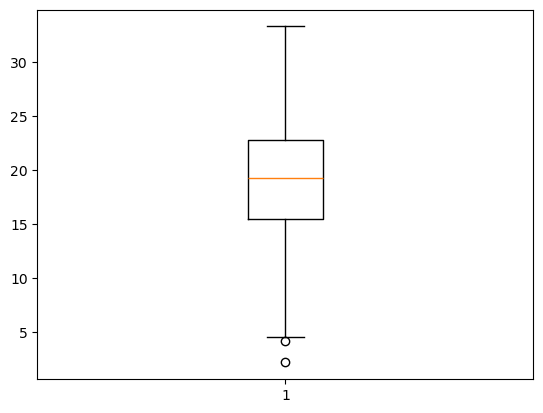

In [27]:
plt.boxplot(df['temp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f83b355090>,
 'caps': [<matplotlib.lines.Line2D at 0x1f83b355310>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f83b354f50>],
 'medians': [<matplotlib.lines.Line2D at 0x1f83b355590>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f83b3556d0>],
 'means': []}

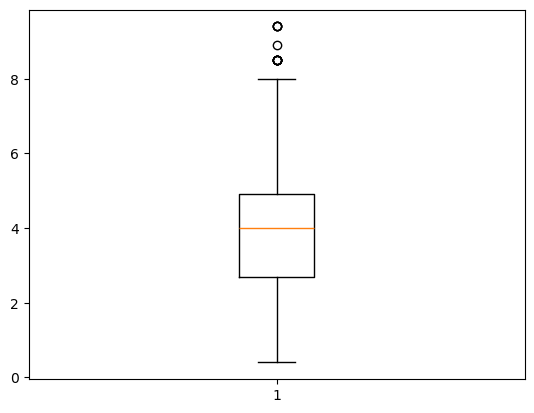

In [28]:
plt.boxplot(df['wind'])

In [29]:
col = 'wind'
q1 = df[col].quantile(0.25)
q3 = df[col].quantile(0.75)

In [30]:
IQR = q3 - q1

In [31]:
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

In [32]:
df_filtered = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [33]:
df_filtered.shape

(504, 11)

In [34]:
df.shape

(517, 11)

In [35]:
df.shape[0] - df_filtered.shape[0]

13

{'whiskers': [<matplotlib.lines.Line2D at 0x1f83bbbc7d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f83bbbca50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f83bbbc690>],
 'medians': [<matplotlib.lines.Line2D at 0x1f83bbbccd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f83bbbce10>],
 'means': []}

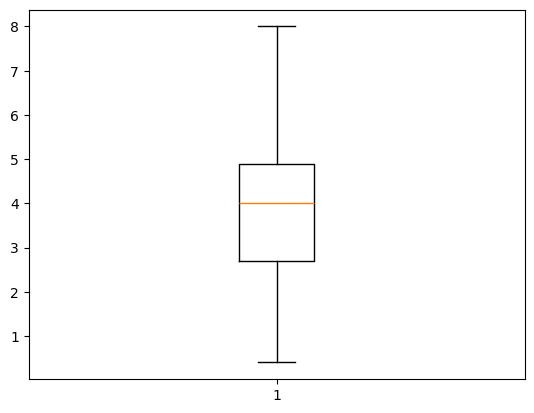

In [36]:
plt.boxplot(df_filtered[col])

In [37]:
df_filtered.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8


In [38]:
#A = A.reset_index(drop=True)

In [39]:
A = df_filtered.drop('temp', axis = 'columns')

In [40]:
b_binned = pd.cut(df_filtered['temp'], bins=3, labels=False)

In [41]:
#b = df_filtered['temp']

In [42]:
A = A.reset_index(drop=True)
b_binned = b_binned.reset_index(drop=True)

In [43]:
scores = cross_val_score(rfclf, A, b_binned, cv = kf)

In [44]:
scores.mean()

np.float64(0.8134257425742574)